In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
#Read the ratings files
data_path="C:\Arun\python\DataSheets\ml-latest-small\\"
df = pd.read_csv(data_path+'ratings.csv')
df.head()

In [13]:
#Read the ratings files
movie_titles = pd.read_csv(data_path+'Movies.csv')
movie_titles.head()

In [16]:
#Merge the movies to the ratings file
df = pd.merge(df, movie_titles, on='movieId')

In [20]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [34]:
#Create a ratings data frame
#For each movie, the average rating and the number of ratings
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [35]:
ratings['number_of_ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [36]:
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


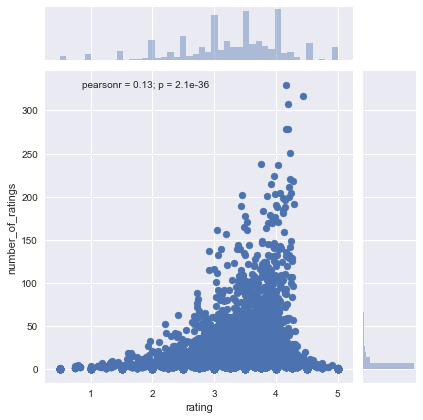

In [43]:
#Find the corelation between the rating and number of ratings
sns.jointplot(x='rating', y='number_of_ratings', data=ratings);

In [45]:
#Create a movie matrix
#Columns as movies and an row for each user
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#View the movies that have more ratings
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [84]:
#For the movies get the ratings and number of ratings
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']
pulp_friction_user_rating = movie_matrix['Pulp Fiction (1994)']

In [55]:
#Use Corr with method to get the corellation of movies simmlar to the one selected
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)

C:\Users\Sethu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Sethu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [72]:
similar_to_air_force_one

title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                          0.168459
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.086874
*batteries not included (1987)                                                       

In [59]:
similar_to_air_force_one.sort_values(axis=0, ascending=False).head(10)

title
Let It Ride (1989)                           1.0
Stepford Wives, The (1975)                   1.0
Saving Silverman (Evil Woman) (2001)         1.0
Batman Beyond: Return of the Joker (2000)    1.0
Sudden Impact (1983)                         1.0
Sudden Death (1995)                          1.0
Brave One, The (2007)                        1.0
Altered States (1980)                        1.0
Ladder 49 (2004)                             1.0
Horse Whisperer, The (1998)                  1.0
dtype: float64

In [60]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

C:\Users\Sethu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Sethu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [61]:
similar_to_contact.sort_values(axis=0, ascending=False).head(10)

title
Return of Jafar, The (1994)     1.0
Dragonfly (2002)                1.0
Doom Generation, The (1995)     1.0
Precious (2009)                 1.0
Vatel (2000)                    1.0
Speed Racer (2008)              1.0
Maze Runner, The (2014)         1.0
Dragnet (1987)                  1.0
Batman: Gotham Knight (2008)    1.0
Doctor Strange (2016)           1.0
dtype: float64

In [62]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640


In [64]:
corr_contact.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Grown Ups (2010),1.0
"Crazies, The (2010)",1.0
Deadpool 2 (2018),1.0
"Mosquito Coast, The (1986)",1.0
Armour of God II: Operation Condor (Operation Condor) (Fei ying gai wak) (1991),1.0
Armour of God (Long xiong hu di) (1987),1.0
"Deep End of the Ocean, The (1999)",1.0
Derailed (2005),1.0
"Descendants, The (2011)",1.0


In [63]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000


In [65]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])

In [66]:
corr_AFO .head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


In [67]:
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [68]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107
Apollo 13 (1995),0.536136,201
Twister (1996),0.511892,123
American Pie (1999),0.501064,103
"Truman Show, The (1998)",0.500529,125


In [69]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144


In [96]:
def next_movies_list(movie,movie_matrix,ratings):
    #print(movie)
    movie_users_rating=movie_matrix[movie]
    #print(movie_users_rating)
    similar_movie=movie_matrix.corrwith(movie_users_rating)
    similar_movie_correlation = pd.DataFrame(similar_to_contact, columns=['Correlation'])
    similar_movie_correlation.dropna(inplace=True)
    #Join the ratings
    similar_movie_correlation = similar_movie_correlation.join(ratings['number_of_ratings'])
    #Movies with 100+ ratings and higher correlation
    next_movies = similar_movie_correlation[similar_movie_correlation['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)
    return next_movies

In [110]:
movie='Departed, The (2006)'
#AFO_user_rating = movie_matrix['Air Force One (1997)']
movie_users_rating=movie_matrix[movie]
next_movies =next_movies_list(movie,movie_matrix,ratings)
for i in next_movies.index:
    print (i)

C:\Users\Sethu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Sethu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


Sleepless in Seattle (1993)
American Pie (1999)
Clear and Present Danger (1994)
Firm, The (1993)
Bourne Identity, The (2002)
Outbreak (1995)
E.T. the Extra-Terrestrial (1982)
Apollo 13 (1995)
Die Hard: With a Vengeance (1995)
Four Weddings and a Funeral (1994)
